In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, make_scorer
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train=pd.read_csv(r"C:\Users\aksha\Downloads\advance regression\train.csv")
test=pd.read_csv(r"C:\Users\aksha\Downloads\advance regression\test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
set(train.columns)-set(test.columns)

{'SalePrice'}

In [5]:
set(test.columns)-set(train.columns)

set()

In [6]:
if train.Id.nunique() == len(train):
    print("No duplicates") 

No duplicates


In [7]:
# Drop 'Id' column
train.drop("Id",axis=1, inplace=True)
test.drop("Id",axis=1, inplace=True)

# Drop records in train dataset that do not contain the 'SalePrice' data
train.dropna(axis=0,subset="SalePrice", inplace=True)

print("train size:",train.shape)
print("test size:",test.shape)

train size: (1460, 80)
test size: (1459, 79)


<Axes: >

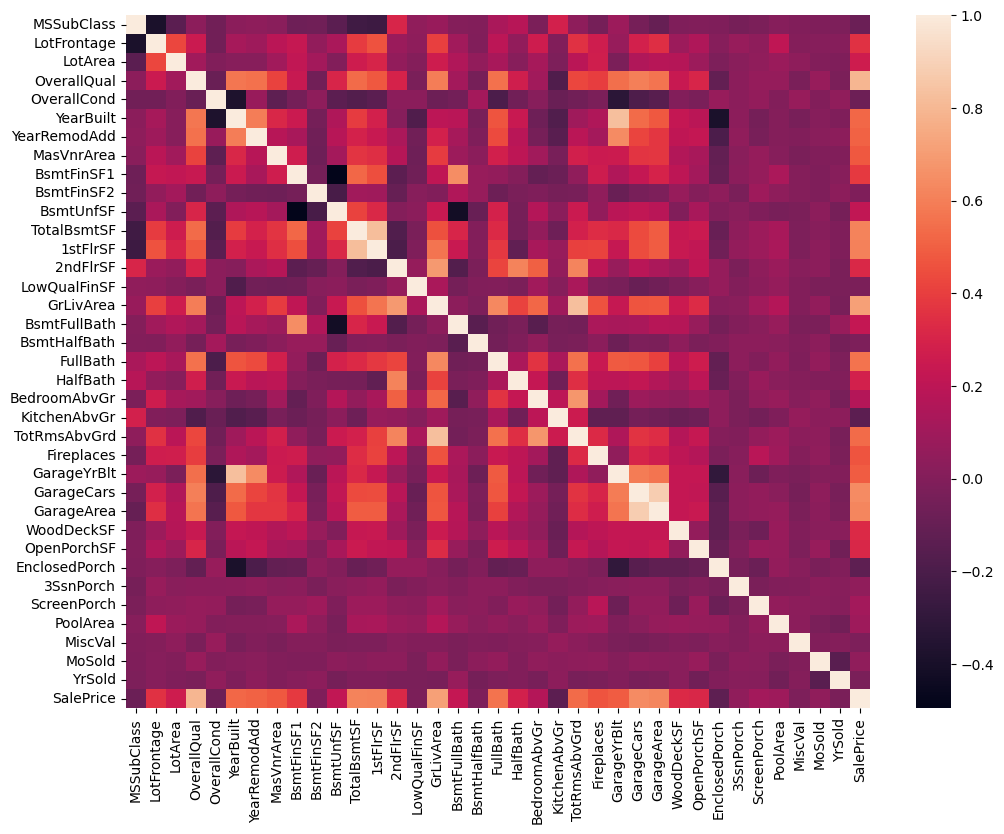

In [8]:
df_corr = train.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr())

In [9]:
#Identify top 10 high correlation features
top10corrfeatures = df_corr.corr()['SalePrice']
top10corrfeatures = abs(top10corrfeatures).sort_values(ascending=False)
top10corrfeatures = top10corrfeatures[:11]
print(top10corrfeatures)
top10corrfeatures = top10corrfeatures.index.to_list()
top10corrfeatures.remove('SalePrice')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


[]

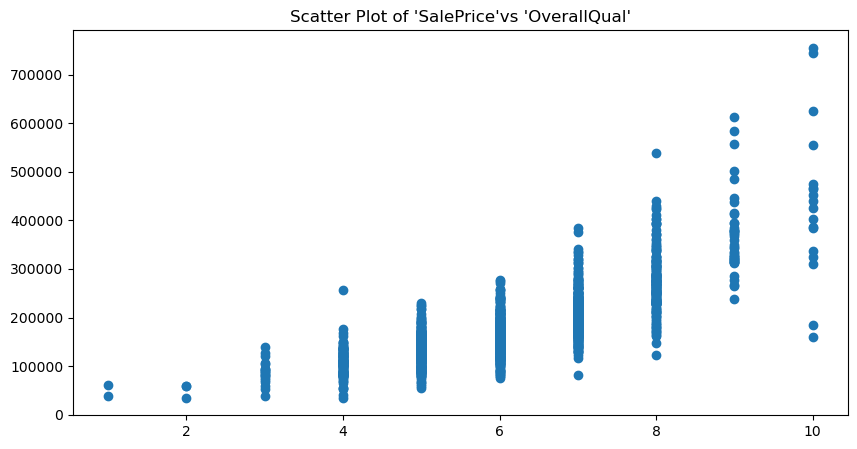

In [10]:
# Scatter plots for top 10 high correlation features
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'OverallQual'")
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.plot()

[]

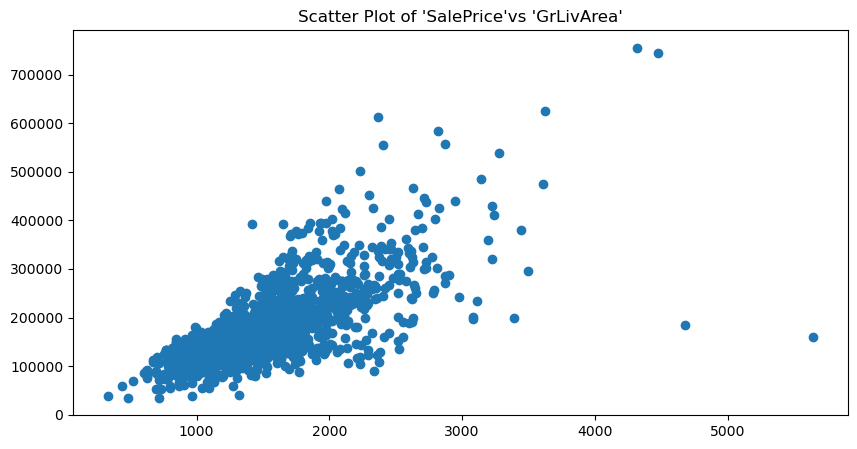

In [11]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'GrLivArea'")
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.plot()

[]

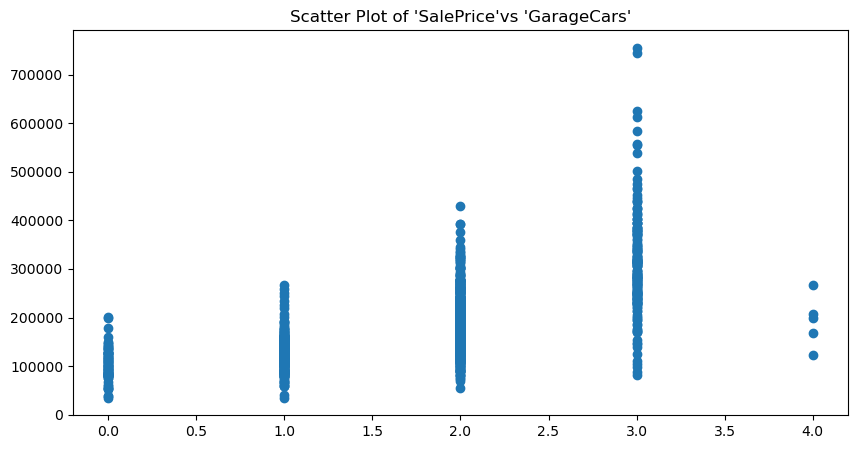

In [12]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'GarageCars'")
plt.scatter(x=train['GarageCars'], y=train['SalePrice'])
plt.plot()

[]

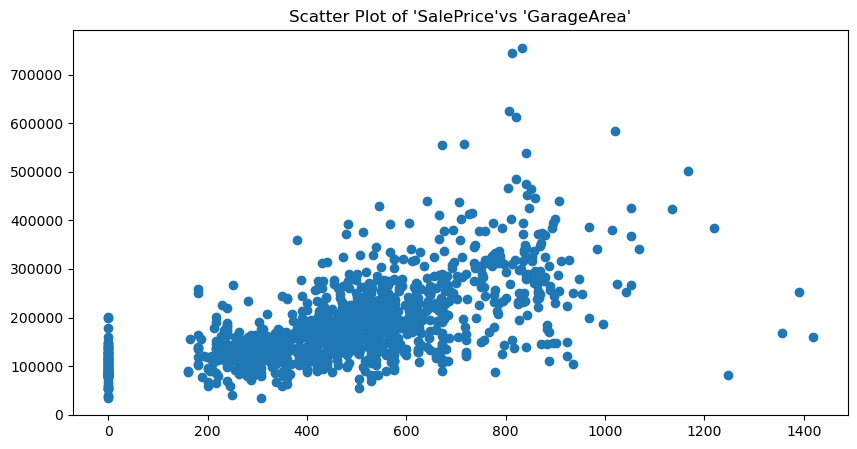

In [13]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'GarageArea'")
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.plot()

[]

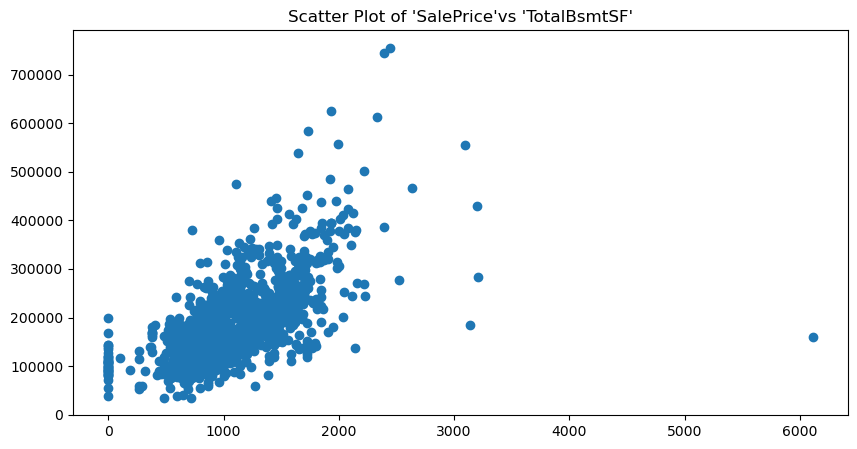

In [14]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'TotalBsmtSF'")
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.plot()

[]

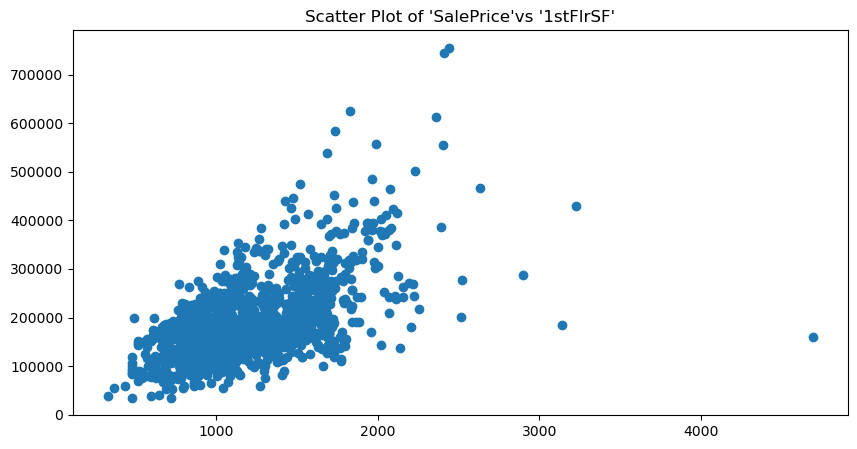

In [15]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs '1stFlrSF'")
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'])
plt.plot()

[]

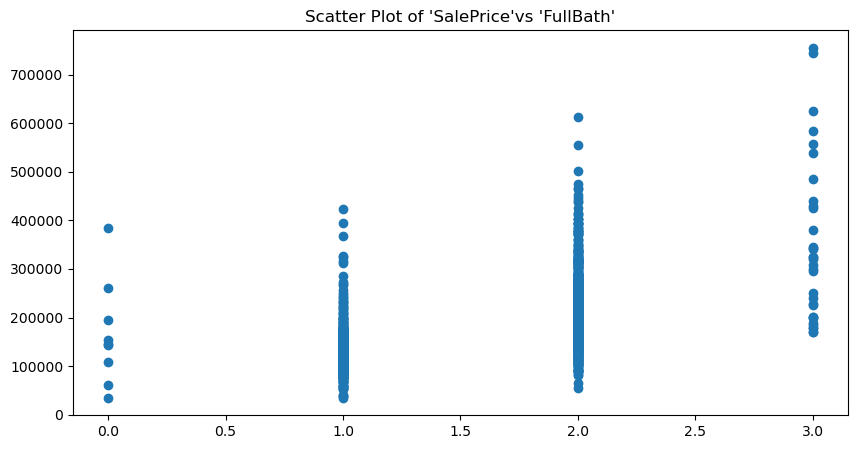

In [16]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'FullBath'")
plt.scatter(x=train['FullBath'], y=train['SalePrice'])
plt.plot()

[]

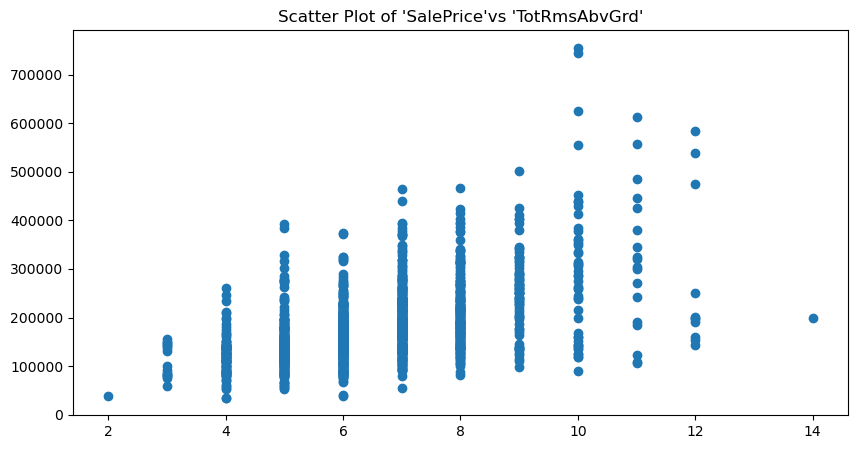

In [17]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'TotRmsAbvGrd'")
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'])
plt.plot()

[]

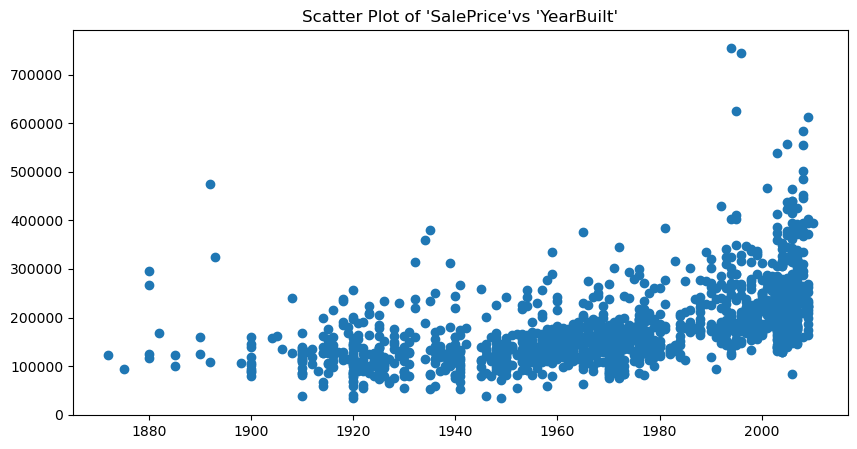

In [18]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'YearBuilt'")
plt.scatter(x=train['YearBuilt'], y=train['SalePrice'])
plt.plot()

[]

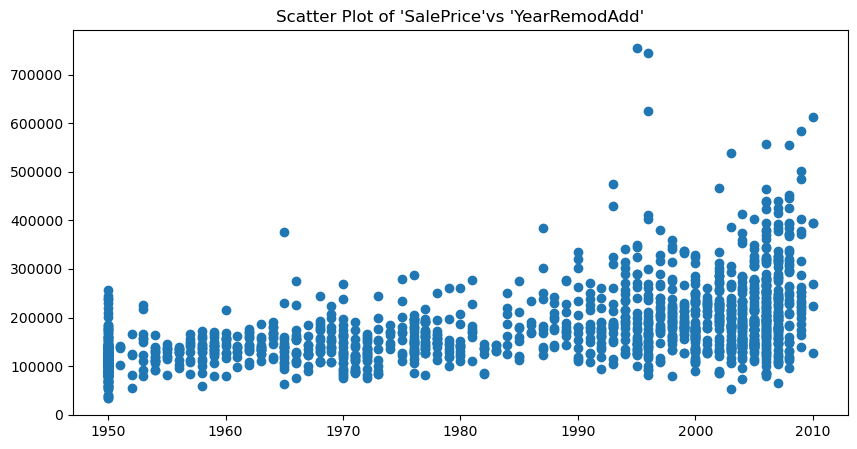

In [19]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot of 'SalePrice'vs 'YearRemodAdd'")
plt.scatter(x=train['YearRemodAdd'], y=train['SalePrice'])
plt.plot()

In [20]:
# Descriptive Statistic for Target Variable 'SalePrice'
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
# Descriptive Statistic for Target Variable 'SalePrice'
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
#EDA Missing Data
# Identify % of missing data for each feature in train dataset
missing_cols = train.isnull().sum()
missing_cols = missing_cols[missing_cols>0].sort_values(ascending=False)
missing_cols = missing_cols/len(train)
missing_cols

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [24]:
index_miss_gf_or_gyb = train[(train['GarageFinish'].isnull()) | (train['GarageYrBlt'].isnull())].index
train.loc[index_miss_gf_or_gyb,:][['GarageCond', 'GarageQual', 'GarageType','GarageFinish','GarageYrBlt']]

,GarageCond,GarageQual,GarageType,GarageFinish,GarageYrBlt
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [25]:
index_miss_gf_or_gyb = train[(train['MasVnrType'].isnull()) | (train['MasVnrArea'].isnull())].index
train.loc[index_miss_gf_or_gyb,:][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [26]:
missing_cols = test.isnull().sum()
missing_cols = missing_cols[missing_cols>0].sort_values(ascending=False)
missing_cols

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [27]:
index_miss_gf_or_gyb = test[(test['BsmtFinSF1'].isnull()) | (test['BsmtFinSF2'].isnull())|
                            (test['BsmtUnfSF'].isnull()) | (test['TotalBsmtSF'].isnull())].index
test.loc[index_miss_gf_or_gyb,:][['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtExposure','BsmtCond']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtExposure,BsmtCond
660,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
index_miss_gf_or_gyb = test[(test['GarageCars'].isnull()) | (test['GarageArea'].isnull())].index
test.loc[index_miss_gf_or_gyb,:][['GarageCond','GarageCars','GarageArea']]

,GarageCond,GarageCars,GarageArea
1116,NaN,NaN,NaN


Skew for 'SalePrice':  1.8828757597682129
Kurt for 'SalePrice':  6.536281860064529


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512989))

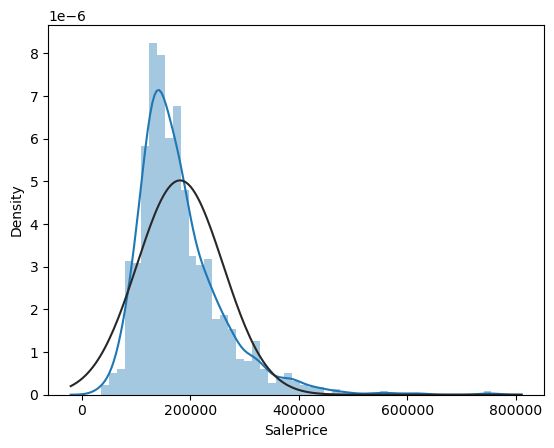

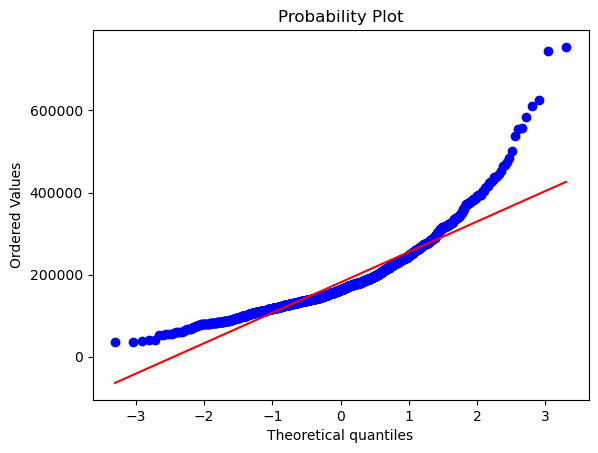

In [29]:
#Histogram and normal probability plot
print("Skew for 'SalePrice': ",train['SalePrice'].skew())
print("Kurt for 'SalePrice': ",train['SalePrice'].kurt())
sns.distplot(train['SalePrice'] , fit=norm)
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

In [30]:
# Identify Numeric Features
numeric_features = sorted(train.select_dtypes(exclude="object").columns.to_list())
print("Numerical Features size:", len(numeric_features))
print(numeric_features,'\n')

Numerical Features size: 37
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'] 



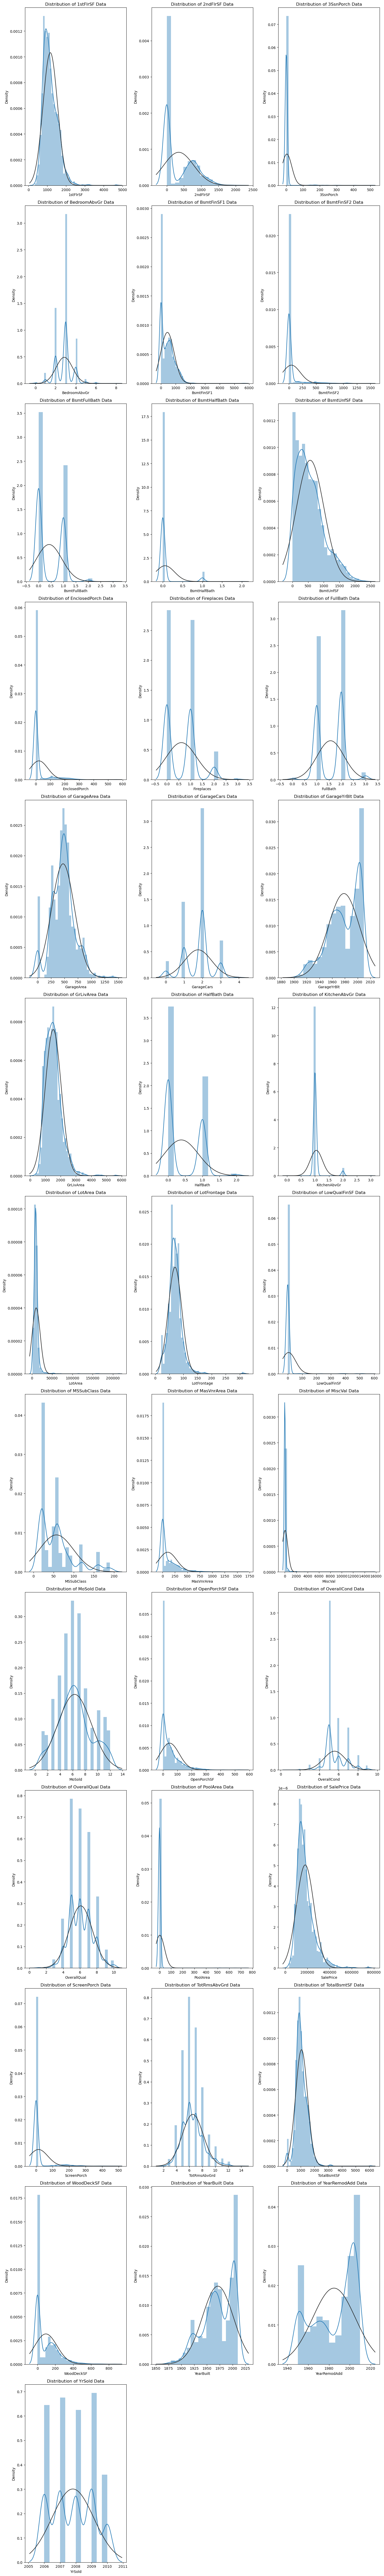

In [31]:
# Distribution Plot for Numeric Features
plt.figure(figsize = (15,100))
for i, col in enumerate(numeric_features,1):
    plt.subplot(13,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.distplot(train[col] , fit=norm)
    plt.tight_layout()
    plt.plot()

In [32]:
# Identify Skewed Features (skew>0.75)
skewed_features = train[numeric_features].skew()
skewed_features = skewed_features[abs(skewed_features)>0.75].sort_values(ascending=False)
print(f"total {len(skewed_features)} features are skewed")
print(skewed_features)
skewed_features = skewed_features.index

total 22 features are skewed
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64


In [33]:
# Identify Categorical Features
categorical_features = train.select_dtypes(include="object").columns.to_list()
print("Categorical Features size:", len(categorical_features))
print(categorical_features)

Categorical Features size: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


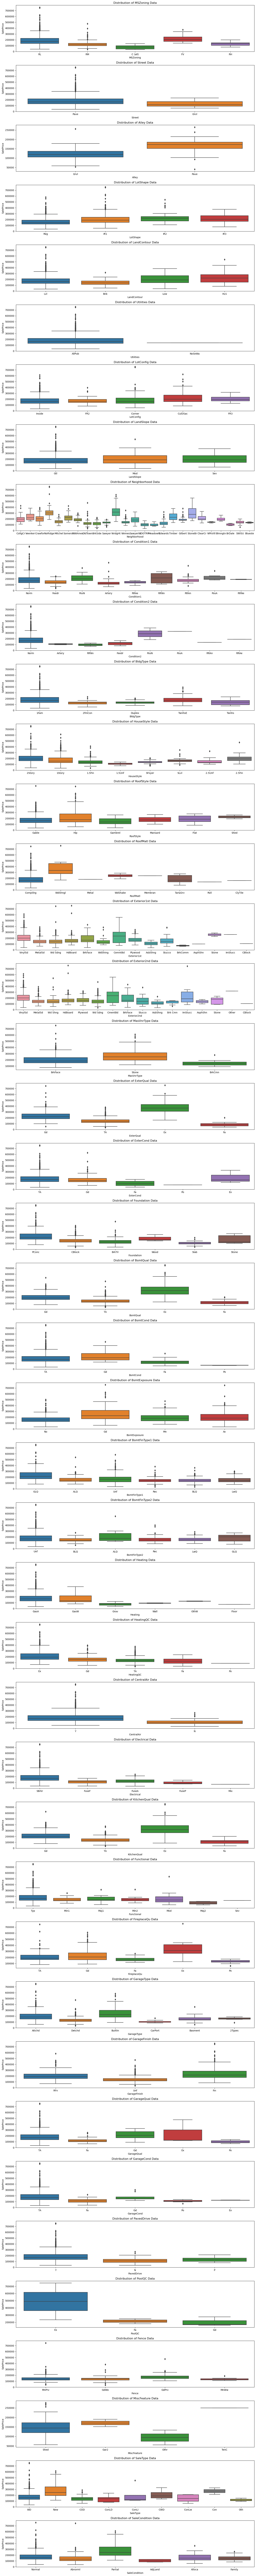

In [34]:
# Distribution plot for categorical features
plt.figure(figsize = (15,150))
for i, col in enumerate(categorical_features,1):
    plt.subplot(43,1,i)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(x=train[col],y=train['SalePrice'])
    plt.tight_layout()
    plt.plot()

<Axes: xlabel='Utilities', ylabel='SalePrice'>

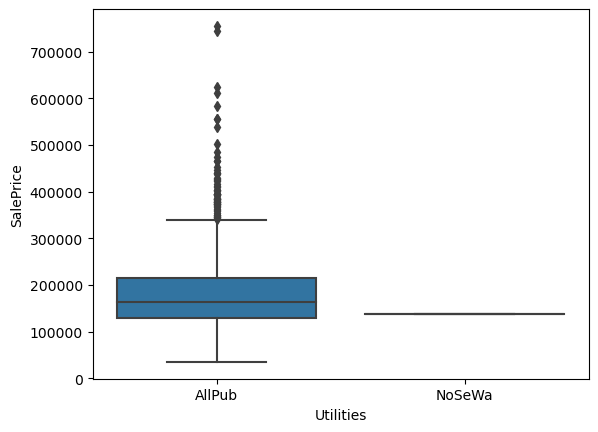

In [35]:
sns.boxplot(x=train['Utilities'],y=train['SalePrice'])

In [37]:
print("train size:",train.shape)
print("test size:",test.shape)

train size: (1449, 80)
test size: (1459, 79)


In [36]:
#Removing Outliers
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>5500) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['YearBuilt']<1900) & (train['SalePrice']>400000)].index, inplace=True)
train.drop(train[(train['GarageArea']<2005) & (train['SalePrice']>600000)].index, inplace=True)
train.drop(train[(train['GarageArea']<2005) & (train['SalePrice']>600000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print("train size after removing outliers:",train.shape)
print("test size after removing outliers:",test.shape)

train size after removing outliers: (1449, 80)
test size after removing outliers: (1459, 79)


In [38]:
#train dataset
missing_cols = train.isnull().sum()
missing_cols = missing_cols[missing_cols>0].sort_values(ascending=False)
missing_cols

PoolQC          1444
MiscFeature     1396
Alley           1358
Fence           1170
MasVnrType       868
FireplaceQu      689
LotFrontage      257
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [39]:
#  test dataset
missing_cols = test.isnull().sum()
missing_cols = missing_cols[missing_cols>0].sort_values(ascending=False)
missing_cols

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [40]:
#Handling Missing Data
#fill none in missing values
feature_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
                'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                'MasVnrType', 'MiscFeature', 'PoolQC']
for feature in feature_none:
    train[feature].fillna("None", inplace=True)
    test[feature].fillna("None", inplace=True)

In [41]:
# filling median
feature_median = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               'GarageArea','GarageCars','GarageYrBlt','MasVnrArea']
for feature in feature_median:
    train[feature].fillna(train[feature].median(), inplace=True)
    test[feature].fillna(train[feature].median(), inplace=True)

In [42]:
# filling mean
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [43]:
# filling mode
feature_mode = ['BsmtFullBath', 'BsmtHalfBath', 'Electrical', 'Exterior1st', 'Exterior2nd',
                'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']
for feature in feature_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(train[feature].mode()[0], inplace=True)

In [44]:
# Null Values in train and test dataset after transformation
print("Null values in train dataset:",train.isnull().values.sum())
print("Null values in test dataset:",test.isnull().values.sum())
print("Train dataset size:",train.shape)
print("Test dataset size:",test.shape)

Null values in train dataset: 0
Null values in test dataset: 0
Train dataset size: (1449, 80)
Test dataset size: (1459, 79)


In [45]:
#Handling Categorical Features
# Identify Categorical and Numerical Features in train dataset
numerical_features = sorted(train.select_dtypes(exclude="object").columns.to_list())
categorical_features = sorted(train.select_dtypes(include="object").columns.to_list())
print("Numerical Features size:", len(numerical_features))
print(numerical_features,'\n')
print("Categorical Features size:", len(categorical_features))
print(categorical_features)

Numerical Features size: 37
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'] 

Categorical Features size: 43
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZ

In [46]:
#ordinal_encoding
train.replace({
    'HouseStyle': {'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,
                  'SLvl':7},
    'Utilities': {'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0},
    'LandSlope': {'Gtl':2, 'Mod':1, 'Sev':0},
    'LandContour':{'Bnk':2, 'HLS':1, 'Low':0, 'Lvl':3},
    'CentralAir': {'N':0, 'Y':1},
    'PavedDrive': {'N':0, 'P':1, 'Y':2},
    'GarageFinish':{'Fin':3, 'None':0, 'RFn':2, 'Unf':1},
    'BsmtExposure': {'Av':3, 'Gd':4, 'Mn':2, 'No':1, 'None':0},
    'BsmtCond':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'BsmtQual':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'FireplaceQu':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'GarageCond':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'GarageQual':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'BsmtFinType1':{'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1},
    'BsmtFinType2':{'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1},
    'PoolQC': {'Ex':4, 'Fa':1, 'Gd':3, 'None':0,'TA':2},
    'Fence':{'GdPrv':4, 'GdWo':2, 'MnPrv':3, 'MnWw':1, 'None':0},
    'ExterCond':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'ExterQual':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'HeatingQC':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'KitchenQual':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'LotShape':{'IR1':2, 'IR2':1, 'IR3':3, 'Reg':0},
    'Functional':{'Maj1':3, 'Maj2':2, 'Min1':6, 'Min2':5, 'Mod':4, 'Sev':1, 'Typ':7,'Sal':0}
},inplace=True)

test.replace({
    'HouseStyle': {'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,
                  'SLvl':7},
    'Utilities': {'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0},
    'LandSlope': {'Gtl':2, 'Mod':1, 'Sev':0},
    'LandContour':{'Bnk':2, 'HLS':1, 'Low':0, 'Lvl':3},
    'CentralAir': {'N':0, 'Y':1},
    'PavedDrive': {'N':0, 'P':1, 'Y':2},
    'GarageFinish':{'Fin':3, 'None':0, 'RFn':2, 'Unf':1},
    'BsmtExposure': {'Av':3, 'Gd':4, 'Mn':2, 'No':1, 'None':0},
    'BsmtCond':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'BsmtQual':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'FireplaceQu':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'GarageCond':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'GarageQual':{'Fa':2, 'Gd':4, 'None':0, 'Po':1, 'TA':3,'Ex':5},
    'BsmtFinType1':{'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1},
    'BsmtFinType2':{'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'None':0, 'Rec':3, 'Unf':1},
    'PoolQC': {'Ex':4, 'Fa':1, 'Gd':3, 'None':0,'TA':2},
    'Fence':{'GdPrv':4, 'GdWo':2, 'MnPrv':3, 'MnWw':1, 'None':0},
    'ExterCond':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'ExterQual':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'HeatingQC':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'KitchenQual':{'Ex':4, 'Fa':1, 'Gd':3, 'Po':0, 'TA':1},
    'LotShape':{'IR1':2, 'IR2':1, 'IR3':3, 'Reg':0},
    'Functional':{'Maj1':3, 'Maj2':2, 'Min1':6, 'Min2':5, 'Mod':4, 'Sev':1, 'Typ':7,'Sal':0}
},inplace=True)

In [47]:
# Identify Categorical and Numerical Features in both train and test dataset
numerical_features = sorted(train.select_dtypes(exclude="object").columns.to_list())
categorical_features = sorted(train.select_dtypes(include="object").columns.to_list())
print("Numerical Features size:", len(numerical_features))
print(numerical_features,'\n')
print("Categorical Features size:", len(categorical_features))
print(categorical_features)

Numerical Features size: 60
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'] 

Categorical Features size: 20
['Alley', 'BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Gara

In [48]:
#One hot Encoding
train_cat = train[categorical_features]
test_cat = test[categorical_features]
train_num = train[numerical_features]

# Test dataset does not contain the target variable 'SalePrice'
numerical_features_without_target = numerical_features.copy()
numerical_features_without_target.remove('SalePrice')
test_num = test[numerical_features_without_target]

In [49]:
# Apply One Hot Encoding on both the train and test dataset's categorical feature
print("train_cat.shape before concat",train_cat.shape)
print("test_cat.shape before concat",test_cat.shape)
all_cat=pd.DataFrame()
all_cat = pd.concat((train_cat,test_cat)).reset_index(drop=True)
print("all_cat.shape after concat:",all_cat.shape)
all_cat_ohc = pd.get_dummies(all_cat)
print("all_cat.shape after applying one hot encoding,:",all_cat_ohc.shape)
train_cat_ohc = all_cat_ohc[:train_cat.shape[0]]
test_cat_ohc = all_cat_ohc[train_cat.shape[0]:].reset_index(drop=True)

print("train_num.shape:",train_num.shape)
print("test_num.shape:",test_num.shape)
print("train_cat_ohc.shape after applying one hot encoding:",train_cat_ohc.shape)
print("test_cat_ohc.shape after applying one hot encoding:",test_cat_ohc.shape)

train_cat.shape before concat (1449, 20)
test_cat.shape before concat (1459, 20)
all_cat.shape after concat: (2908, 20)
all_cat.shape after applying one hot encoding,: (2908, 154)
train_num.shape: (1449, 60)
test_num.shape: (1459, 59)
train_cat_ohc.shape after applying one hot encoding: (1449, 154)
test_cat_ohc.shape after applying one hot encoding: (1459, 154)


In [50]:
#Creating New Features
#Identify top 10 high correlation features
df_corr = train.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
top10corrfeatures = df_corr.corr()['SalePrice']
top10corrfeatures = abs(top10corrfeatures).sort_values(ascending=False)
top10corrfeatures = top10corrfeatures[:11]
print(top10corrfeatures)
top10corrfeatures = top10corrfeatures.index.to_list()
top10corrfeatures.remove('SalePrice')
print("\nTop 10 high correlation features =",top10corrfeatures)

SalePrice       1.000000
OverallQual     0.803906
GrLivArea       0.714557
ExterQual       0.675508
GarageCars      0.656512
GarageArea      0.652094
KitchenQual     0.646962
TotalBsmtSF     0.646726
1stFlrSF        0.623048
BsmtQual        0.597324
GarageFinish    0.565043
Name: SalePrice, dtype: float64

Top 10 high correlation features = ['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'GarageArea', 'KitchenQual', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'GarageFinish']


In [51]:
# Create 3 new polynomial features based on the existing top 10 high correlation features.
for feat in top10corrfeatures:
    train_num[feat+"-s2"] = train_num[feat]**2
    train_num[feat+"-s3"] = train_num[feat]**3
    train_num[feat+"-sqrt"] = np.sqrt(train_num[feat])
    test_num[feat+"-s2"] = test_num[feat]**2
    test_num[feat+"-s3"] = test_num[feat]**3
    test_num[feat+"-sqrt"] = np.sqrt(test_num[feat])
print("train_num.shape:",train_num.shape)
print("test_num.shape:",test_num.shape)

train_num.shape: (1449, 90)
test_num.shape: (1459, 89)


In [53]:
#Non Linear Scaling on Numerical Features
# Identify Skewed Features
skewed_features = train_num.skew()
skewed_features = skewed_features[abs(skewed_features)>0.75].sort_values(ascending=False).drop(labels='SalePrice')
print(f"total {len(skewed_features)} features are skewed")
print(skewed_features)
skewed_features = skewed_features.index

total 57 features are skewed
MiscVal              24.413304
PoolQC               21.099363
PoolArea             17.480116
LotArea              12.938833
3SsnPorch            10.264483
LowQualFinSF          9.167172
TotalBsmtSF-s3        5.959384
KitchenAbvGr          4.469037
1stFlrSF-s3           4.239185
BsmtFinSF2            4.236882
BsmtHalfBath          4.117362
ScreenPorch           4.084496
BsmtFinType2          3.281317
EnclosedPorch         3.074949
GrLivArea-s3          2.950488
GarageArea-s3         2.696205
ExterCond             2.678733
TotalBsmtSF-s2        2.566838
MasVnrArea            2.556496
OpenPorchSF           2.352612
GarageCars-s3         2.060351
1stFlrSF-s2           2.047533
Fence                 1.807126
GrLivArea-s2          1.777406
LotFrontage           1.717098
WoodDeckSF            1.557677
GarageArea-s2         1.510101
MSSubClass            1.402356
OverallQual-s3        1.377010
ExterQual-s3          1.358430
HouseStyle            1.180571
BsmtExposu

In [54]:
train_num['SalePrice'] = np.log1p(train_num['SalePrice'])
train_num[skewed_features] = np.log1p(train_num[skewed_features])
test_num[skewed_features] = np.log1p(test_num[skewed_features])
train_num[skewed_features].skew().sort_values(ascending=False)

PoolQC               19.181098
PoolArea             16.964935
3SsnPorch             7.704388
LowQualFinSF          7.586644
MiscVal               5.207203
BsmtHalfBath          3.944924
KitchenAbvGr          3.852084
ScreenPorch           3.151625
ExterCond             2.607635
BsmtFinSF2            2.510071
EnclosedPorch         2.099551
BsmtFinType2          1.852469
Fence                 1.656624
ExterQual-s2          0.598672
ExterQual-s3          0.595641
BsmtExposure          0.574048
MasVnrArea            0.508528
HouseStyle            0.411818
2ndFlrSF              0.292620
MSSubClass            0.248991
GarageFinish-s3       0.207218
KitchenQual-s3        0.201153
WoodDeckSF            0.158349
1stFlrSF             -0.007880
1stFlrSF-s2          -0.008760
1stFlrSF-s3          -0.008762
OpenPorchSF          -0.014957
GrLivArea            -0.133552
GrLivArea-s2         -0.134322
GrLivArea-s3         -0.134324
LotArea              -0.218898
GarageCars-s3        -0.309998
GarageCa

In [55]:
#merging numerical and categorical
print("train_num.shape:",train_num.shape)
print("test_num.shape:",test_num.shape)
print("train_cat_ohc.shape:",train_cat_ohc.shape)
print("test_cat_ohc.shape:",test_cat_ohc.shape)
transformed_train = pd.concat([train_num, train_cat_ohc], axis=1)
transformed_test = pd.concat([test_num, test_cat_ohc], axis=1)
print("transformed_train.shape after concat:",transformed_train.shape)
print("transformed_test.shape after concat:",transformed_test.shape)

train_num.shape: (1449, 90)
test_num.shape: (1459, 89)
train_cat_ohc.shape: (1449, 154)
test_cat_ohc.shape: (1459, 154)
transformed_train.shape after concat: (1449, 244)
transformed_test.shape after concat: (1459, 243)


In [59]:
#Modelling Tree based Algorithms
# Partition the train dataset into train + validation sets
y = transformed_train['SalePrice']
X = transformed_train.drop(['SalePrice'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=0)

In [60]:
# Model Evaluation Functions
# Model Evaluation Metrics RMSE using both the training set and validation set
scorer = make_scorer(mean_squared_error, greater_is_better=False)
def rmse_cv_train(model):
    return np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)))
def rmse_cv_test(model):
    return np.mean(np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10)))

# Define a dictionary to contain the RMSE results for each model
rmse_cv_train_dic = {}
rmse_cv_test_dic = {}

In [61]:
# Define Model Evaluation Metrics RMSE using both the training set and validation set
scorer = make_scorer(mean_squared_error, greater_is_better=False)
def rmse_cv_train(model):
    return np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)))
def rmse_cv_test(model):
    return np.mean(np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10)))

# Define a dictionary to contain the RMSE results for each model
rmse_cv_train_dic = {}
rmse_cv_test_dic = {}

In [62]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rmse_cv_train_dic["rf"] = rmse_cv_train(rf)
rmse_cv_test_dic["rf"] = rmse_cv_test(rf)
print("RF RMSE on Training set :", rmse_cv_train_dic["rf"])
print("RF RMSE on Test set :", rmse_cv_test_dic["rf"])

RF RMSE on Training set : 0.1436593760406104
RF RMSE on Test set : 0.13846107960955117


In [63]:
#gradient boosting
gbr = GradientBoostingRegressor() 
gbr.fit(X_train, y_train)
rmse_cv_train_dic["gbr"] = rmse_cv_train(gbr)
rmse_cv_test_dic["gbr"] = rmse_cv_test(gbr)
print("GBR RMSE on Training set :", rmse_cv_train_dic["gbr"])
print("GBR RMSE on Test set :", rmse_cv_test_dic["gbr"])

GBR RMSE on Training set : 0.12694875393183608
GBR RMSE on Test set : 0.12129441665214266


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
from xgboost import XGBRegressor

In [66]:
#XGB
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
rmse_cv_train_dic["xgboost"] = rmse_cv_train(xgboost)
rmse_cv_test_dic["xgboost"] = rmse_cv_test(xgboost)
print("xgboost RMSE on Training set :", rmse_cv_train_dic["xgboost"])
print("xgboost RMSE on Test set :", rmse_cv_test_dic["xgboost"])

xgboost RMSE on Training set : 0.14490140791012157
xgboost RMSE on Test set : 0.1385458144206692


In [69]:
pip install lightgbm

In [73]:
from lightgbm import LGBMRegressor

In [74]:
lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train)
rmse_cv_train_dic["lightgbm"] = rmse_cv_train(lightgbm)
rmse_cv_test_dic["lightgbm"] = rmse_cv_test(lightgbm)
print("LightGBM RMSE on Training set :", rmse_cv_train_dic["lightgbm"])
print("LightGBM RMSE on Test set :", rmse_cv_test_dic["lightgbm"])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 1014, number of used features: 158
[LightGBM] [Info] Start training from score 12.003754
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6035
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 154
[LightGBM] [Info] Start training from score 12.003787
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3121
[LightGBM] [Info] Number of data points in the train set: 391, number of used features: 130
[LightGBM] [Info] Start training from score 12.063070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 128
[LightGBM] [Info] Start training from score 12.044852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [75]:
#Modelling Non Tree Based Algorithms
# Linear Scaling
rbs = RobustScaler()
numerical_features = X_train.select_dtypes(exclude='object').columns
X_train[numerical_features] = rbs.fit_transform(X_train[numerical_features])
X_test[numerical_features] = rbs.transform(X_test[numerical_features])
transformed_test[numerical_features] = rbs.transform(transformed_test[numerical_features])

In [76]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse_cv_train_dic["lr"] = rmse_cv_train(lr)
rmse_cv_test_dic["lr"] = rmse_cv_test(lr)
print("Linear Regression RMSE on Training set:",rmse_cv_train_dic["lr"])
print("Linear Regression RMSE on Validation set :",rmse_cv_test_dic["lr"])

Linear Regression RMSE on Training set: 0.13692191202050757
Linear Regression RMSE on Validation set : 0.17226919393825713


In [77]:
#Ridge regression
ridge = RidgeCV(alphas = [0.001,0.05,0.01,0.5,0.1])
ridge.fit(X_train, y_train)
rmse_cv_train_dic["ridge"] = rmse_cv_train(ridge)
rmse_cv_test_dic["ridge"] = rmse_cv_test(ridge)
print("Ridge RMSE on Training set :", rmse_cv_train_dic["ridge"])
print("Ridge RMSE on Test set :", rmse_cv_test_dic["ridge"])

Ridge RMSE on Training set : 0.11958434210470596
Ridge RMSE on Test set : 0.1156821581185727


In [78]:
#lasso Regression
lasso = LassoCV(alphas = [0.001,0.05,0.01,0.5,0.1])
lasso.fit(X_train, y_train)
rmse_cv_train_dic["lasso"] = rmse_cv_train(lasso)
rmse_cv_test_dic["lasso"] = rmse_cv_test(lasso)
print("Lasso's RMSE on Training set :", rmse_cv_train_dic["lasso"])
print("Lasso's RMSE on Test set :", rmse_cv_test_dic["lasso"])

Lasso's RMSE on Training set : 0.11412333019967133
Lasso's RMSE on Test set : 0.10571679570886497


In [79]:
#elastic Net
elastic = ElasticNetCV(l1_ratio = [0.1,0.3,0.5,0.7,0.9],
                       alphas = [0.001,0.05,0.01,0.5,0.1]
                      )
elastic.fit(X_train,y_train)
rmse_cv_train_dic["elastic"] = rmse_cv_train(elastic)
rmse_cv_test_dic["elastic"] = rmse_cv_test(elastic)
print("ElasticNet RMSE on Training set :", rmse_cv_train_dic["elastic"])
print("ElasticNet RMSE on Test set :", rmse_cv_test_dic["elastic"])

ElasticNet RMSE on Training set : 0.11361682022813935
ElasticNet RMSE on Test set : 0.10590214247117335


In [80]:
#conclusion
model_result_dic = {'model':[],'rmse-cv-train':[],'rmse-cv-test':[]}
for modelname in rmse_cv_train_dic.keys():
    model_result_dic["model"].append(modelname)
    model_result_dic['rmse-cv-train'].append(rmse_cv_train_dic[modelname])
    model_result_dic['rmse-cv-test'].append(rmse_cv_test_dic[modelname])
model_df = pd.DataFrame(model_result_dic)
model_df

,model,rmse-cv-train,rmse-cv-test
0,rf,0.143659,0.138461
1,gbr,0.126949,0.121294
2,xgboost,0.144901,0.138546
3,lightgbm,0.133200,0.130301
4,lr,0.136922,0.172269
5,ridge,0.119584,0.115682
6,lasso,0.114123,0.105717
7,elastic,0.113617,0.105902


In [81]:
test = pd.read_csv(r"C:\Users\aksha\Downloads\advance regression\test.csv")
print(test.shape)
print(transformed_test.shape)

(1459, 80)
(1459, 243)


In [82]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = np.floor(np.expm1(lasso.predict(transformed_test)))
submission.to_csv('submission.csv',index=False)
submission

,Id,SalePrice
0,1461,118589.0
1,1462,157036.0
2,1463,180609.0
3,1464,196109.0
4,1465,187245.0
...,...,...
1454,2915,92767.0
1455,2916,84395.0
1456,2917,166023.0
1457,2918,121278.0


In [83]:
submission.describe()

,Id,SalePrice
count,1459.000000,1.459000e+03
mean,2190.000000,1.783209e+05
std,421.321334,8.061145e+04
min,1461.000000,4.412000e+04
25%,1825.500000,1.256965e+05
50%,2190.000000,1.575690e+05
75%,2554.500000,2.104290e+05
max,2919.000000,1.250150e+06
